In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

# Exploratory data analysis on Google Apps Ratings

In [39]:
google_data = pd.read_csv('googleplaystore.csv')

In [40]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
google_data.shape

(10841, 13)

## Basic stats on the data

In [42]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


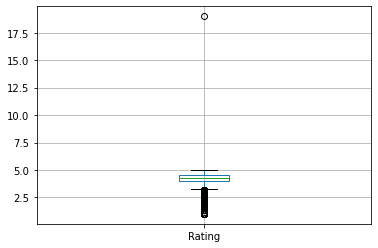

In [43]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf1647aa90>]],
      dtype=object)

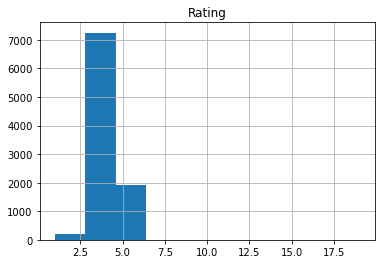

In [44]:
google_data.hist()


In [45]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

Count the number of missing values in the DataFrame


In [46]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Check how many ratings are more than 5 - Outliers

In [48]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
google_data.drop([10472],inplace=True)

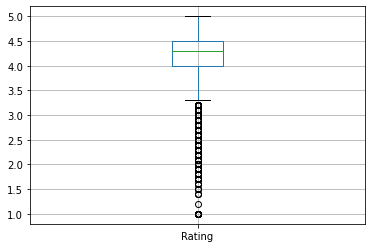

In [50]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf16396f10>]],
      dtype=object)

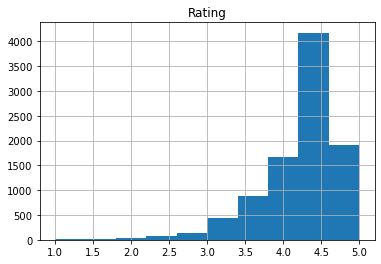

In [51]:
google_data.hist()

## Central Tendency: Choosing an appropriate value to fill missing ones.

As seen from the histogram above the data is skewed to the right. Hence the **median** should be used as the
measure of central tendency!

Source: <href>https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php</href>


1. First we choose a threshold value from the dataset. This means that there cannot be more null values than
indicated in the threshold.


In [52]:
threshold = len(google_data)*0.1
threshold

1084.0

In [53]:
google_data.dropna(thresh=threshold,axis=1,inplace=True)

In [54]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

2. Data imputation & Manipulation
    - Fill the null values with appropriate values using aggregate functions such as
mean, median & mode.
    - Categorical values will be filled using mode, while numerical values will be filled with median!

In [55]:
def impute_median(series):
    """
    Takes a column and fills the missing values with the
    median of that data.
    :param series: Series with missing values
    :return: Series with 0 null values
    """
    return series.fillna(series.median())

In [56]:
google_data.Rating = google_data['Rating'].transform(lambda x : x.fillna(x.median()))

In [57]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

For categorical data, missing values must be filled in with the mode. However,
there may be bimodal features so watch out.


In [58]:
# modes of categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [59]:
# Fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)


In [60]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Last step of data cleaning, clean semi-numerical data into numerical data.

In [61]:
# Let's convert Price, Reviews and Ratings into Numerical Values
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [62]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Is there an easier way to find all the symbols/characters inside semi-numerical values?
- When should we convert to `int` vs `float`?



In [63]:
# more conversions...
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))


In [65]:
google_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Check summary stats after cleaning

In [66]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Data Analysis


In [67]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Plotting the avearage rating for apps across each category...

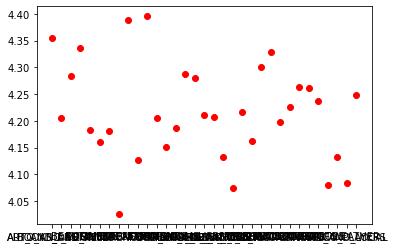

In [68]:
plt.plot(x, 'ro')

Lets make the figure more readable...

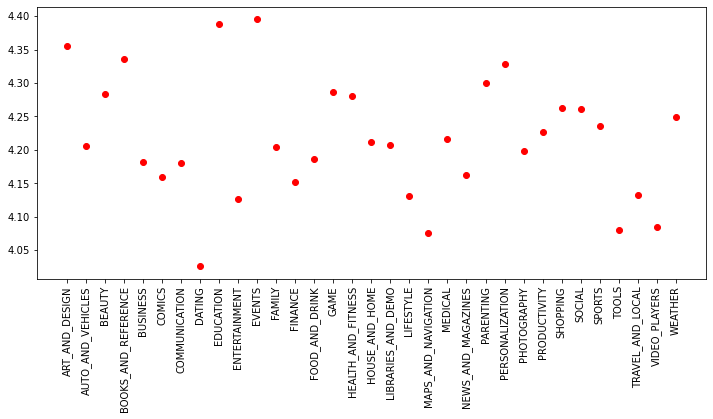

In [70]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

Plotting the amount of money spent on apps across each category



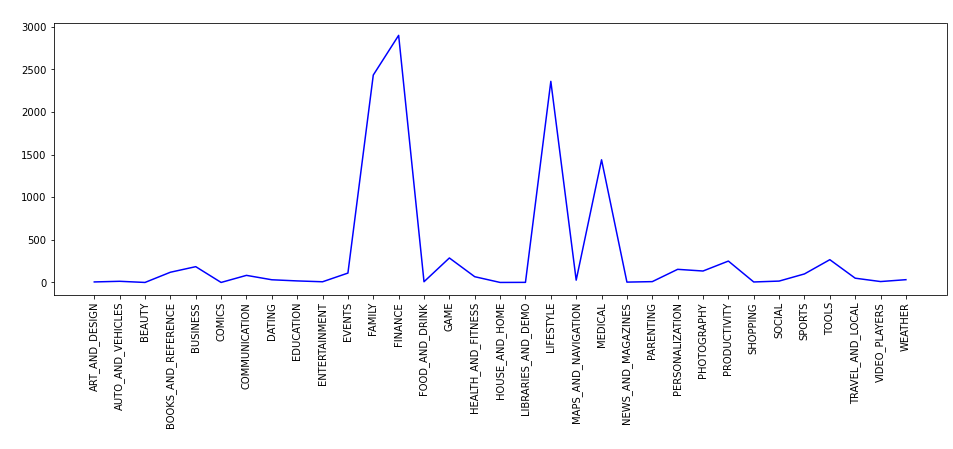

In [73]:
plt.figure(figsize=(16,5))
plt.plot(y, color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing',color='w')
plt.xlabel('Categories -- >',color='w')
plt.ylabel('Prices -- >',color='w')
plt.show()

Plotting the number of reviews for apps across categories


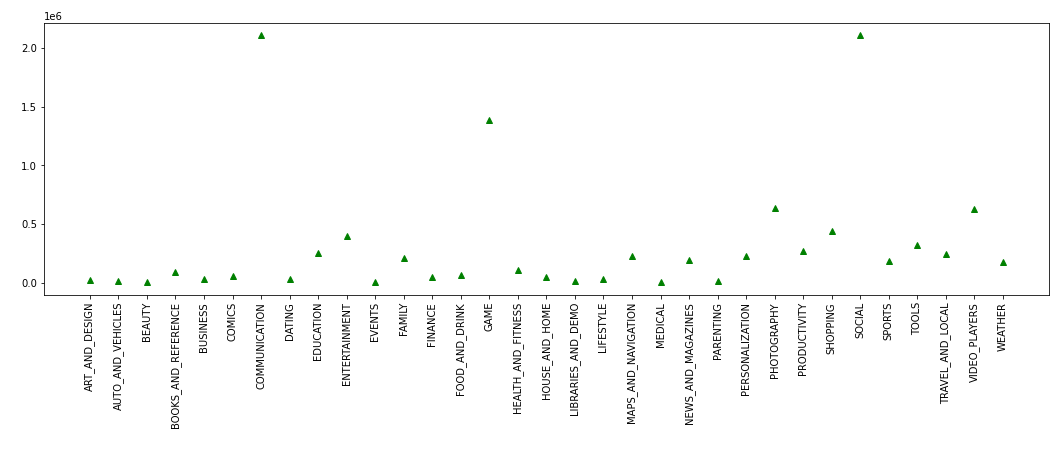

In [77]:
plt.figure(figsize=(18,5))
plt.plot(z, 'g^', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews',color='w')
plt.xlabel('Categories -- >',color='w')
plt.ylabel('Reviews -- >',color='w')
plt.show()


In [79]:
google_data.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


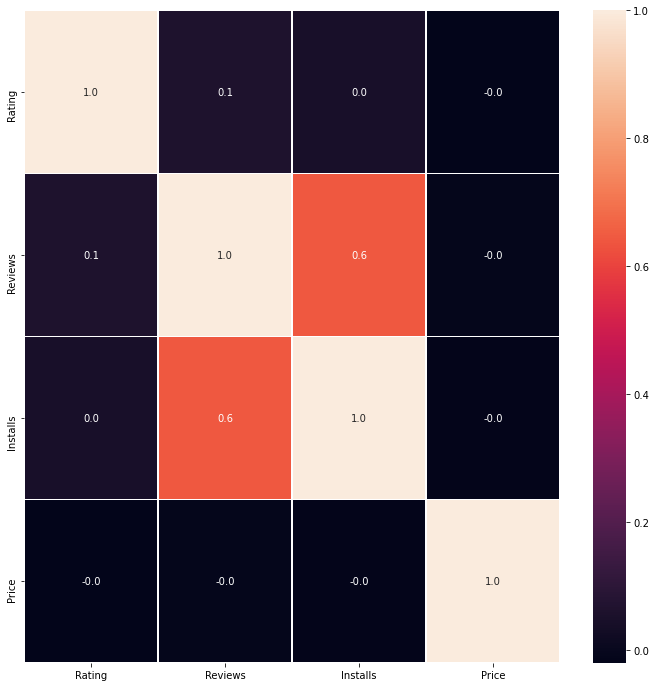

In [80]:
# corr map
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(google_data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()


Content rating



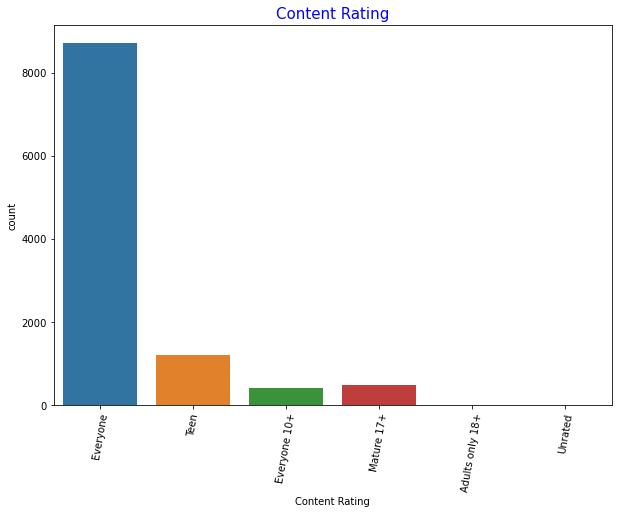

In [81]:
plt.figure(figsize=(10,7))
sns.countplot(data=google_data,x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating', color = 'b', fontsize = 15)
plt.show()
